In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [264]:
df = pd.read_csv('../pitchfork2.csv')

# df['word_count'] = df['content'].str.count('\w+')
# df['adj_count'] = df['content_adj'].str.count('\w+')

# df['avg_word_length'] = df['content'].str.count('[^ ]') / df['word_count']
# df['adj_word_length'] = df['content_adj'].str.count('[^ ]') / df['content_adj'].str.count('\w+')
# df['adj_freq'] = df['adj_count'] / df['word_count']

In [73]:
years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

In [301]:
df_spot = pd.read_csv('spotifydata2.csv')
df_spot2 = pd.read_csv('../spotifydata.csv')

In [302]:
df_spot = pd.concat([df_spot, df_spot2])

In [303]:
df_spot['artist'] = df_spot['artist'].str.lower()

In [304]:
df_spot['year'] = df_spot['album_release_year'].str[0:4].astype(int)

In [305]:
df_spot

,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity,artist,year
0,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,You,1MyqLTRhgyWPw7v107BEuI,0.223,0.706,...,0.006800,0.1090,0.2970,112.889,208667.0,3.0,A major,49,radiohead,1993
1,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Creep,6b2oQwSGFkzsMtQruIWm2p,0.515,0.430,...,0.000141,0.1290,0.1040,91.841,238640.0,4.0,G major,79,radiohead,1993
2,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,How Do You?,71wIOoaoVMUwskK5yCXZL4,0.185,0.964,...,0.879000,0.1070,0.2390,147.362,132173.0,4.0,A major,46,radiohead,1993
3,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Stop Whispering,2zYmvi3w2T8a9Ckrv21bvW,0.212,0.696,...,0.016500,0.1290,0.2980,122.370,325627.0,4.0,D major,46,radiohead,1993
4,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Thinking About You,3ovbSnT5NNhl1gzMcw1NRZ,0.364,0.370,...,0.000008,0.0883,0.4210,103.440,161533.0,4.0,G major,49,radiohead,1993
5,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Anyone Can Play Guitar,4NUc1M0CS7b6zvWoyvibju,0.294,0.813,...,0.000756,0.3330,0.5540,150.845,217800.0,4.0,E minor,46,radiohead,1993
6,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Ripcord,4nklmaiY4gfQI3SB1sLGsd,0.256,0.906,...,0.366000,0.3220,0.2540,137.949,189733.0,4.0,D major,43,radiohead,1993
7,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Vegetable,11qDTSr3Dj4TkPnBcIOqEJ,0.384,0.717,...,0.569000,0.1870,0.4200,105.852,192667.0,4.0,F# major,43,radiohead,1993
8,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,Prove Yourself,4D6ZExVvYLZxhcAvifX5px,0.250,0.620,...,0.084800,0.1750,0.3190,114.098,145373.0,4.0,C major,42,radiohead,1993
9,6400dnyeDyD2mIFHfkwHXN,Pablo Honey,https://i.scdn.co/image/e17011b2aa33289dfa6c08...,1993-02-22,1993-02-22,74,I Can't,48IEDejXX5LH8TAC3VIGpc,0.284,0.825,...,0.300000,0.1180,0.2760,106.108,253093.0,4.0,G major,42,radiohead,1993


In [306]:
df_spot_grouped = df_spot.groupby(['artist', 'album_name', 'album_release_year', 'album_uri']).agg([np.sum, np.mean, np.std])
df_spot_grouped.reset_index(inplace=True)
df_spot_grouped['title'] = df_spot_grouped['album_name'].str.lower()
df_spot_grouped['title'] = df_spot_grouped['title'].str.split('(')
df_spot_grouped['title'] = df_spot_grouped['title'].str[0].str.strip()

In [307]:
df_spot_grouped[df_spot_grouped['artist'] == 'wilco']

artist                           album_name album_release_year  \
                                                                       
45926  wilco                      A ghost is born         2004-06-21   
45927  wilco                A.M. (Deluxe Edition)         1995-01-01   
45928  wilco                          Being There         1996-01-01   
45929  wilco  Kicking Television, Live in Chicago         2005-11-15   
45930  wilco                             Schmilco         2016-09-09   
45931  wilco                         Sky Blue Sky         2007-05-14   
45932  wilco                            Star Wars         2015-07-17   
45933  wilco                          Summerteeth         1999-03-08   
45934  wilco      The Whole Love (Deluxe Edition)         2011-09-27   
45935  wilco                    Wilco [the album]         2009-01-01   
45936  wilco                 Yankee Hotel Foxtrot         2002-04-16   

                    album_uri album_popularity            danceability  \
                                           sum  mean  std          sum   
45926  1RCxMEn5jFeUWbof3vy8oC              936  39.0  0.0      11.4476   
45927  2QQrpuxfvKwnPwOac3q337             1360  34.0  0.0      19.6720   
45928  4gy64TkuOWP2Uuu1DuDeZK             1710  45.0  0.0      19.4300   
45929  658J2tPbnZqhwxKEiczOID             1320  33.0  0.0      14.6360   
45930  2s037WsNDbSTIEb7OJjT0a             1344  56.0  0.0      15.7120   
45931  3RYkB0Uv1qOHSdgRySWJd0             1632  48.0  0.0      18.2620   
45932  7BD2cOGKumTOMctWSysCD5              968  44.0  0.0      12.2160   
45933  1JpaFJzzcsiulO6MdIcQdK             1768  52.0  0.0      16.0560   
45934  5HelbMCeX3uTOZFxRMHF3w             1472  46.0  0.0      16.2100   
45935  3UeSYkvpAJfXp97Os7Y1sK             1056  44.0  0.0      14.7960   
45936  0rPtXOMN42nsLDiShvGamv             1342  61.0  0.0      12.0780   

                                          ...                  time_signature  \
           mean       std                 ...                             sum   
45926  0.476983  0.182733                 ...                            94.0   
45927  0.491800  0.110417                 ...                           154.0   
45928  0.511316  0.119045                 ...                           148.0   
45929  0.365900  0.089962                 ...                           158.0   
45930  0.654667  0.112629                 ...                            94.0   
45931  0.537118  0.120857                 ...                           128.0   
45932  0.555273  0.145376                 ...                            88.0   
45933  0.472235  0.157624                 ...                           128.0   
45934  0.506563  0.114324                 ...                           128.0   
45935  0.616500  0.061020                 ...                            96.0   
45936  0.549000  0.210374                 ...                            86.0   

                          track_popularity                         year        \
           mean       std              sum       mean        std    sum  mean   
45926  3.916667  0.282330              636  26.500000   2.146787  48096  2004   
45927  3.850000  0.361620              726  18.150000   2.646236  79800  1995   
45928  3.894737  0.311012             1103  29.026316   4.365013  75848  1996   
45929  3.950000  0.220721              644  16.100000   3.086779  80200  2005   
45930  3.916667  0.282330              958  39.916667   6.613009  48384  2016   
45931  3.764706  0.430562              996  29.294118   7.047585  68238  2007   
45932  4.000000  0.000000              693  31.500000   4.102845  44330  2015   
45933  3.764706  0.955330             1080  31.764706  10.441928  67966  1999   
45934  4.000000  0.000000              962  30.062500   5.951077  64352  2011   
45935  4.000000  0.000000              650  27.083333   7.773515  48216  2009   
45936  3.909091  0.294245              998  45.363636   7.267314  44044  2002   

In [308]:
df_spot_grouped.columns = [' '.join(col).strip() for col in df_spot_grouped.columns.values]


In [309]:
df_spot_grouped['order_of_release'] = df_spot_grouped.groupby('artist')['album_release_year'].rank(ascending=True)

In [310]:
df_spot_grouped[df_spot_grouped['artist'] == 'weird al yankovic']

,artist,album_name,album_release_year,album_uri,album_popularity sum,album_popularity mean,album_popularity std,danceability sum,danceability mean,danceability std,...,time_signature mean,time_signature std,track_popularity sum,track_popularity mean,track_popularity std,year sum,year mean,year std,title,order_of_release
45654,weird al yankovic,"""Weird Al"" Yankovic",1983-01-01,1gnhuWdl30liEUM2jy9lxl,420,35.0,0.0,7.517,0.626417,0.131180,...,4.000000,0.000000,274,22.833333,3.761850,23796,1983,0.0,"""weird al"" yankovic",1.0
45655,weird al yankovic,Alapalooza,1993-01-01,5yrh4YoCqCyqyTmFPIRilv,432,36.0,0.0,7.408,0.617333,0.160819,...,4.000000,0.000000,268,22.333333,7.877855,23916,1993,0.0,alapalooza,8.0
45656,weird al yankovic,Alpocalypse,2011-06-17,7xioktcLt004PnB9nqwBWz,600,50.0,0.0,7.630,0.635833,0.132705,...,4.000000,0.000000,433,36.083333,4.962740,24132,2011,0.0,alpocalypse,14.0
45657,weird al yankovic,Bad Hair Day,1996-12-31,0Jlz2oUJcRROhY8MFMp609,576,48.0,0.0,7.231,0.602583,0.119108,...,3.916667,0.288675,376,31.333333,7.075352,23952,1996,0.0,bad hair day,10.0
45658,weird al yankovic,Dare To Be Stupid,1985-01-01,4sug9Au5Rrm34TwdTAux5O,418,38.0,0.0,7.604,0.691273,0.114118,...,3.909091,0.301511,290,26.363636,3.695206,21835,1985,0.0,dare to be stupid,3.0
45659,weird al yankovic,Even Worse,1988-01-01,2pHmvW8zaVfxHJaEjkeAsS,407,37.0,0.0,7.885,0.716818,0.128623,...,4.000000,0.000000,269,24.454545,4.633867,21868,1988,0.0,even worse,5.0
45660,weird al yankovic,In 3-D,1984-01-01,5mIwtOp8f0flDHmn8jOxDD,429,39.0,0.0,7.313,0.664818,0.168290,...,3.909091,0.301511,277,25.181818,5.671299,21824,1984,0.0,in 3-d,2.0
45661,weird al yankovic,Mandatory Fun,2014-07-15,36jlZKG1sNZQA2HbWdYveV,648,54.0,0.0,7.046,0.587167,0.178058,...,4.000000,0.000000,486,40.500000,5.485518,24168,2014,0.0,mandatory fun,15.0
45662,weird al yankovic,Off The Deep End,1992-01-01,6qr3P9IV7X8zSmRWUfKTNL,407,37.0,0.0,7.149,0.649909,0.184264,...,4.000000,0.000000,281,25.545455,3.559877,21912,1992,0.0,off the deep end,7.0
45663,weird al yankovic,Permanent Record: Al In The Box,1994-01-01,6qe9hRwFfbcgtXXsif6BQZ,880,44.0,0.0,13.505,0.675250,0.154071,...,3.950000,0.223607,448,22.400000,3.844340,39880,1994,0.0,permanent record: al in the box,9.0


In [311]:
df_spot_grouped.to_csv('spotify_with_rank.csv')

In [291]:
df.drop(['num_years_since_release', 'year'], axis=1, inplace=True)

ValueError: labels ['num_years_since_release' 'year'] not contained in axis

In [117]:
title_artists = []
for each in na_artists:
    title_artists.append(each.title())

In [118]:
len(title_artists)

5159

In [233]:
title_artists.index('Parlour')

4008

In [119]:
pd.DataFrame(title_artists).to_csv('title_artists.csv')

In [277]:
df = df.merge(df_spot_grouped, on=['artist', 'title'])

In [156]:
import statsmodels.api as sm

In [180]:
df = df.reset_index()

In [182]:
df['danceability mean_x'].values

array([0.6355384615384614, 0.6581999999999999, 0.7889999999999999, ...,
       0.39933333333333326, 0.4509166666666668, 0.6190555555555555], dtype=object)

In [189]:
df['danceability']

0        0.635538
1          0.6582
2           0.789
3          0.6121
4        0.693474
5           0.494
6          0.5942
7        0.512615
8           0.809
9        0.594222
10       0.777267
11         0.5338
12       0.683688
13         0.4694
14         0.6828
15       0.590556
16       0.511833
17       0.294333
18        0.62025
19       0.423182
20       0.702667
21       0.638765
22       0.349333
23       0.528091
24          0.589
25         0.4012
26       0.715571
27        0.14924
28       0.120225
29       0.665687
           ...   
10431    0.521833
10432    0.517167
10433      0.5993
10434    0.488545
10435    0.468889
10436    0.323929
10437      0.6745
10438    0.322462
10439    0.469583
10440    0.772563
10441    0.498533
10442      0.7475
10443    0.387273
10444    0.550286
10445    0.540727
10446    0.484571
10447      0.7318
10448    0.426923
10449    0.357636
10450      0.5174
10451    0.443812
10452       0.487
10453    0.472235
10454    0.493059
10455    0

In [202]:
for each in df.select_dtypes(['number']):
    print each

In [205]:
for each in df.select_dtypes(['number']):
    Y = df['score']
    X = df[each].astype(float)
    X = sm.add_constant(X)

    model = sm.OLS(Y,X)
    results = model.fit()
    print each
    print results.rsquared

In [87]:
artists = df[df['tempo'] == "None"]['artist'].astype(list)

In [116]:
na_artists = df[df['tempo'] == "None"]['artist'].unique().astype(list)

In [213]:
df_spot_grouped[df_spot_grouped['artist'] == 'wilco']['title']

'a ghost is born'

In [211]:
df[df['artist'] == 'wilco'].sort_values('year', ascending=False)

,level_0,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,...,duration_ms std_y,time_signature sum_y,time_signature mean_y,time_signature std_y,track_popularity sum_y,track_popularity mean_y,track_popularity std_y,year sum_y,year mean_y,year std_y
1026,1026,1616,1695,5929da95d7a71d1ea5699c02,schmilco,wilco,https://pitchfork.com/reviews/albums/22355-sch...,7.0,0,0,...,28903.913955,47.0,3.916667,0.288675,479,39.916667,6.761634,24192,2016,0.0
1835,1835,2976,3131,5929deb0d7a71d1ea569a065,star wars,wilco,https://pitchfork.com/reviews/albums/20838-sta...,7.7,0,0,...,60084.138117,44.0,4.000000,0.000000,346,31.454545,4.227615,22165,2015,0.0
7261,7261,12645,13136,5929dab213d197565213cde2,sky blue sky,wilco,https://pitchfork.com/reviews/albums/10219-sky...,5.2,0,0,...,61573.557235,64.0,3.764706,0.437237,498,29.294118,7.156856,34119,2007,0.0
8906,8906,16080,16722,5929e3585e6ef95969325222,a ghost is born,wilco,https://pitchfork.com/reviews/albums/8680-a-gh...,6.6,0,0,...,221654.746471,47.0,3.916667,0.288675,318,26.500000,2.195036,24048,2004,0.0
9892,9892,18294,19035,5929db4e5e6ef959693249bc,yankee hotel foxtrot,wilco,https://pitchfork.com/reviews/albums/8676-yank...,10.0,0,0,...,83411.686984,43.0,3.909091,0.301511,499,45.363636,7.446781,22022,2002,0.0
10453,10453,19607,20378,5929e2c013d197565213d619,summerteeth,wilco,https://pitchfork.com/reviews/albums/8677-summ...,9.4,0,0,...,63614.961681,64.0,3.764706,0.970143,540,31.764706,10.603828,33983,1999,0.0


In [39]:
df['num_years_since_release'] = df['pub_year'] - df['year_y']

In [40]:
df.shape

(10461, 55)

In [209]:
df[df['artist'] == 'bon iver']

,level_0,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,...,duration_ms std_y,time_signature sum_y,time_signature mean_y,time_signature std_y,track_popularity sum_y,track_popularity mean_y,track_popularity std_y,year sum_y,year mean_y,year std_y
973,973,1539,1612,5929da59c0084474cd0c456a,"22, a million",bon iver,https://pitchfork.com/reviews/albums/22420-22-...,9.0,1,0,...,55545.973373,37.0,3.700000,0.483046,615,61.500000,3.135815,20160,2016,0.0
7019,7019,12149,12614,5929d96c0c2bba1b7de0221c,"for emma, forever ago",bon iver,https://pitchfork.com/reviews/albums/10709-for...,8.1,0,0,...,87865.324408,34.0,3.777778,0.440959,289,32.111111,7.096556,18072,2008,0.0


In [41]:
df[df['best_new_music'] == 1].groupby('pub_year')['album_popularity'].mean()

pub_year
2003    24.740741
2004    33.520000
2005    36.851852
2006    40.111111
2007    32.906250
2008    30.950000
2009    36.380952
2010    33.560000
2011    35.000000
2012    30.360000
2013    42.192308
2014    37.576923
2015    42.375000
2016    47.132075
2017    50.388889
Name: album_popularity, dtype: float64

In [43]:
df_2016 = df[df['pub_year'] == 2016]

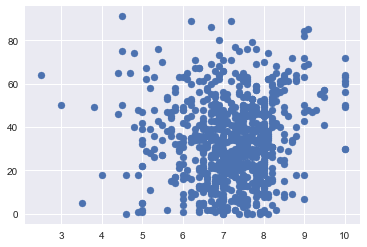

In [44]:
plt.scatter(df_2016['score'], df_2016['album_popularity'])

In [37]:
df.drop([u'genre_electronic', u'genre_experimental',
       u'genre_folk/country', u'genre_global', u'genre_jazz', u'genre_metal',
       u'genre_pop/r&b', u'genre_rap', u'genre_rock'], axis=1, inplace=True)


In [39]:
df.drop(['pub_weekday', 'year', 'pub_month'], axis=1, inplace=True)

In [45]:
df.drop([u'cont_polarity', u'cont_subjectivity', u'abs_polarity',
       u'abs_subjectivity', u'word_count', u'adj_count', u'adj_freq',
       u'score_bin', u'avg_word_length', u'adj_word_length', u'artist_y',
       u'album_name'], axis=1, inplace=True)

In [49]:
df.drop(['track_popularity'], axis=1, inplace=True)

ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

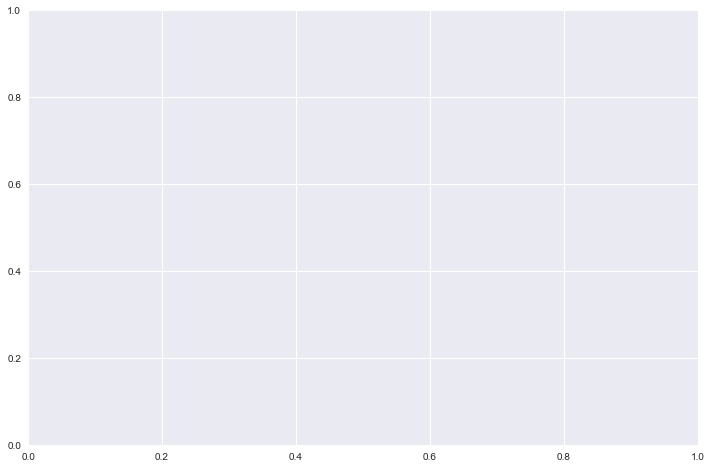

In [205]:
plt.figure(figsize=(12,8))
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['valence'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['danceability'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['liveness'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['acousticness'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['energy'].mean())
plt.legend()
plt.show()

In [219]:
df[(df['instrumentalness'] > .6) & (df['energy'] < .4) & (df['score'] >= 8) & (df['content'].str.contains('ambient'))]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
83,146,168,59f35307e68f6520a90c0afb,phantom brickworks,bibio,https://pitchfork.com/reviews/albums/bibio-pha...,8.2,0,0,andy beta,...,0.970111,0.869222,0.114567,0.108233,81.852556,4.885081e+05,4.222222,7.111111,2017.0,0.0
162,265,287,59c14dd09a887f6ba1bd7b02,new energy,four tet,https://pitchfork.com/reviews/albums/four-tet-...,8.0,0,0,andy beta,...,0.781571,0.723409,0.150829,0.287186,109.508929,2.419421e+05,3.785714,22.785714,2017.0,0.0
447,687,714,5929e802c0084474cd0c50fe,balsams,chuck johnson,https://pitchfork.com/reviews/albums/23275-chu...,8.1,0,0,marc masters,...,0.791667,0.895333,0.104083,0.079833,98.014167,4.135813e+05,3.000000,27.000000,2017.0,0.0
696,1064,1114,5929d8f013d197565213cc3d,no home of the mind,bing & ruth,https://pitchfork.com/reviews/albums/22888-bin...,8.2,0,0,mark richardson,...,0.921300,0.850300,0.103560,0.041340,75.969600,3.562898e+05,3.800000,36.300000,2017.0,0.0
698,1067,1117,5929d8ef0c2bba1b7de021ae,an act of love,earthen sea,https://pitchfork.com/reviews/albums/22896-ear...,8.1,0,0,andy beta,...,0.732875,0.823000,0.122088,0.196300,93.302000,2.887431e+05,3.750000,25.125000,2017.0,0.0
793,1240,1296,5929d9745e6ef959693247d9,clear sounds/perfetta,harry bertoia,https://pitchfork.com/reviews/albums/22715-cle...,8.0,0,0,marc masters,...,0.297000,0.730000,0.120000,0.025600,84.188000,1.020636e+06,4.000000,1.500000,2016.0,1.0
834,1320,1381,5929d9b00c2bba1b7de02263,what you get for being young,suzanne kraft,https://pitchfork.com/reviews/albums/22535-suz...,8.0,0,0,philip sherburne,...,0.587021,0.909429,0.153714,0.336429,104.257857,3.357420e+05,4.000000,15.571429,2016.0,0.0
1016,1585,1661,5929da7bd7a71d1ea5699be3,another green world,brian eno,https://pitchfork.com/reviews/albums/22061-ano...,10.0,0,0,mike powell,...,0.673429,0.622774,0.119800,0.354614,118.398429,1.753761e+05,3.642857,35.142857,1975.0,41.0
1031,1617,1696,5929da945e6ef959693248ef,goodbye to language,daniel lanois,https://pitchfork.com/reviews/albums/22289-goo...,8.1,0,0,philip sherburne,...,0.887250,0.856333,0.105883,0.047692,87.703417,1.838608e+05,3.416667,20.666667,2016.0,0.0
1146,1814,1902,5929db29c0084474cd0c4623,sketches from an island 2,mark barrott,https://pitchfork.com/reviews/albums/22062-ske...,8.0,0,0,andy beta,...,0.756556,0.908556,0.147800,0.391889,122.425667,2.919342e+05,4.000000,17.888889,2016.0,0.0


In [218]:
df[df['artist'].str.contains('william basinski')]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
779,1210,1265,5929d96013d197565213cc9e,a shadow in time,william basinski,https://pitchfork.com/reviews/albums/22738-a-s...,7.9,0,0,daniel martin-mccormick,...,0.8220,0.880000,0.07090,0.25250,104.002000,1.299536e+06,4.5,29.500000,2017.0,0.0
1046,1640,1720,5929daa20c2bba1b7de0235b,92982,william basinski,https://pitchfork.com/reviews/albums/22277-wil...,8.7,1,1,kevin lozano,...,0.9640,0.899000,0.13685,0.04030,113.158000,9.412768e+05,4.0,24.750000,2009.0,7.0
2485,4405,4634,5929e318c0084474cd0c4e26,melancholia,william basinski,https://pitchfork.com/reviews/albums/19246-wil...,7.4,0,0,nick neyland,...,0.9825,0.872714,0.11095,0.07090,85.217357,1.999572e+05,3.5,30.357143,2003.0,11.0
2697,5323,5597,5929e5ba0c2bba1b7de02e5e,nocturnes,william basinski,https://pitchfork.com/reviews/albums/18282-wil...,7.5,0,0,nick neyland,...,0.9885,0.881500,0.09965,0.03735,103.076000,2.069500e+06,3.5,10.000000,2003.0,10.0
4456,17235,17939,5929d8960c2bba1b7de0214e,the river,william basinski,https://pitchfork.com/reviews/albums/576-the-r...,8.8,0,0,andy beta,...,0.5555,0.926500,0.36500,0.07825,78.214500,2.812614e+06,3.5,9.000000,2007.0,-4.0


In [65]:
import difflib

In [68]:
df2 = df

In [69]:
df2.title = df_spot_grouped.title.map(lambda x: difflib.get_close_matches(x, df_spot_grouped.title)[0])

KeyboardInterrupt: 